<a href="https://colab.research.google.com/github/Codeblockz/Data-Science-Self-Projects/blob/main/Kaggle_Titanic_challege/Titanic_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Challenge Kaggle <br></br>
[source 1](https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/)  <br></br>
[source 2]( https://www.kaggle.com/lonnieqin/classification-with-sklearn-and-tensorflow)

## Download Data

In [216]:
# from google.colab import files
# from os.path import exists
# file_exists = exists("/content/kaggle.json")
# if (file_exists==False):
#   files.upload()

In [217]:
%cd /content/drive/MyDrive/Colab Notebooks/Titanic

/content/drive/MyDrive/Colab Notebooks/Titanic


In [218]:
! pip install -q kaggle
!pip install --upgrade kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [219]:
 ! kaggle competitions download titanic

test.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)


Start To work on geting data

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import tensorflow as tf
from tensorflow import feature_column
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import string
import copy
from sklearn import preprocessing

In [221]:
# Load Data
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Titanic/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Titanic/test.csv")
train1 = copy.copy(train)
test1 = copy.copy(test)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Check For Nulls


In [222]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [223]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Check Data Types

In [224]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [225]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Data Scrubing 

## Replace NaN

In [226]:
# from source 2
# Replace NAN
# embark_label = train["Embarked"].mode()[0]
# train["Cabin"] = train["Cabin"].replace(np.NAN,  "Unknown")
# train["Embarked"] = train["Embarked"].replace(np.NAN, embark_label)
# train["Age"] = train["Age"].replace(np.NAN, train["Age"].mean())

# # Test Replace
# test["Cabin"] = test["Cabin"].replace(np.NAN, "Unknown")
# test["Age"] = test["Age"].replace(np.NAN, test["Age"].mean())
# test["Fare"] = test["Fare"].replace(np.NAN, test["Fare"].mean())

In [227]:
def get_replaced_nan(data):
  embark_label = data["Embarked"].mode()[0]
  data["Cabin"] = data["Cabin"].replace(np.NAN,  "Unknown")
  data["Embarked"] = data["Embarked"].replace(np.NAN, embark_label)
  data["Age"] = data["Age"].replace(np.NAN, data["Age"].mean())
  data["Fare"] = data["Fare"].replace(np.NAN, data["Fare"].mean())
  return data

## Make Title Column

In [228]:
# source 1
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if big_string.find(substring) != -1:
            return substring
    # print(big_string) # For debug check
    return np.nan

In [229]:
#replacing all titles with mr, mrs, miss, master
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

In [230]:
# Apply function to data
# title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev', 'Dr', 'Ms', 'Mlle',
#             'Col', 'Capt', 'Mme', 'Countess', 'Don', 'Jonkheer']
# train['Title']=train['Name'].map(lambda x: substrings_in_string(x, title_list))
# test['Title'] = train['Name'].map(lambda x: substrings_in_string(x, title_list))
# train['Title']=train.apply(replace_titles, axis=1)
# test['Title']=test.apply(replace_titles, axis=1)

In [231]:
def get_titles(data):
  title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev', 'Dr', 'Ms', 'Mlle',
            'Col', 'Capt', 'Mme', 'Countess', 'Don', 'Jonkheer']
  data['Title']=data['Name'].map(lambda x: substrings_in_string(x, title_list))
  data['Title']=data.apply(replace_titles, axis=1)
  return data

In [232]:
# data check
#train.head()
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Make Cabin Type

In [233]:
# Make cabin type
# Source 2
# train['Cabin_type'] = train["Cabin"].apply(lambda cabin: cabin[0])
# test["Cabin_type"] = test["Cabin"].apply(lambda cabin: cabin[0])
# # Make New feature
# train["family_member_size"] = 1 + train["SibSp"] + train["Parch"]
# test["family_member_size"] = 1 + test["SibSp"] + test["Parch"]

In [234]:
# data check
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [235]:
# data check 
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Make Family Size Type

The correlation bellow shows that Family size is not linearly related however there is a relationship between survival and family size

In [236]:
def convert_faimly_member_size(size):
    if size == 1:
        return "single"
    elif size < 5:
        return "medium"
    else:
        return "large"

In [237]:
# should_add_family_member_type = True
# if should_add_family_member_type:
#     for data in [train, test]:
#         data["family_member_type"] = train["family_member_size"].apply(convert_faimly_member_size)

## Make Encoders

In [238]:
#encode_vals = ['Sex','Cabin_type','Embarked','Title','family_member_type']
VAL = ['Sex','Cabin_type','Embarked','Title','family_member_type']

In [239]:
# make non one hot encoded values
def make_encode_num(data):
  #val = ['Sex','Cabin_type','Embarked','Title','family_member_type']
  for feature in VAL:
    if feature in data.columns:
      data[feature]=data[feature].astype('category')
      data[feature+'_value']=np.int64(data[feature].cat.codes)
  return data
# train=make_encode_num(train)
# test = make_encode_num(test)

In [240]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [241]:
# make one hot encoding
# originally named one_hot_tit()
# I only relized after I made the function how bad the naming was
def one_hot(data, original_feature=False):
  for feature in VAL:
    if feature in data.columns:
      temp = data[feature]
      data= pd.get_dummies(data, columns=[feature], dtype=int)
      data.pop(feature+'_value')
      if original_feature == True :
        data[feature]=temp
  return data

## More Functions

### Get_Data

In [242]:
def get_data(data, should_add_family_member_type=False):
  # Replace NaNs
  data = get_replaced_nan(data)
  # get titles
  data = get_titles(data)
  # Get Cabin type
  data['Cabin_type'] = data["Cabin"].apply(lambda cabin: cabin[0])
  # Make New feature
  data["family_member_size"] = 1 + data["SibSp"] + data["Parch"]
  # Family memeber
  if should_add_family_member_type:
    data["family_member_type"] = data["family_member_size"].apply(convert_faimly_member_size)
  # encode
  data = make_encode_num(data)
  return data

### CleanUp

In [243]:
# make clean up
# Assumes all data in column is same type
# For numeric data
def cleanUp(data):
  for i in data.columns:
    #print(data[i])
    if isinstance(data[i].iloc[0],(np.float, np.integer))==False:
      # print(i)
      data.pop(i)
  data.pop("PassengerId")
  return data 

### getTuple

In [244]:
# number reshape
def getTuple(Value):
  x, y = Value.shape
  z=1
  t = (x,y,z)
  return t 

### get_train_test

In [245]:
def get_train_test(data, CC = False):
  X = data.drop("Survived", axis=1)
  y = data["Survived"]
  #print("X shape: ", X.shape)
  #print(X.values.reshape(891, 27,1))
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
  X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)
  if CC==True:
    X_train=X_train.values
    y_train= y_train.values
    X_val= X_val.values
    y_val=y_val.values
    X_train=np.expand_dims(X_train,axis=2)
    X_val=np.expand_dims(X_val,axis=2)
  return (X_train, X_val, X_test, y_train, y_val, y_test)

### make_tensor

In [246]:
def make_tensor(data):
  X_train, X_val, X_test, y_train, y_val, y_test = get_train_test= get_train_test(data)
  print("X_train shape: ", X_train.shape)
  print("X_train Type: ", type(X_train))
  print("y_train: ",y_train.shape)
  train_tensor = tf.data.Dataset.from_tensor_slices((X_train.values, y_train.values))
  val_tensor = tf.data.Dataset.from_tensor_slices((X_val.values, y_val.values))
  return train_tensor, val_tensor

In [247]:
# # Testing
# ##################################
# X = copy.copy(OH_train)
# X = X.drop("Survived", axis=1)
# #print("X shape: ", X.shape)
# xshap = X.shape
# x, y = X.shape
# t = (x,y,1)
# #print(t)
# OH_tt, OH_tv = make_tensor(OH_train)
# OH_tt.element_spec

## Apply Functions

### Manual Data Scrub and Format

In [248]:
embark_label = train["Embarked"].mode()[0]
train["Cabin"] = train["Cabin"].replace(np.NAN,  "Unknown")
train["Embarked"] = train["Embarked"].replace(np.NAN, embark_label)
train["Age"] = train["Age"].replace(np.NAN, train["Age"].mean())
# Test Replace
test["Cabin"] = test["Cabin"].replace(np.NAN, "Unknown")
test["Age"] = test["Age"].replace(np.NAN, test["Age"].mean())
test["Fare"] = test["Fare"].replace(np.NAN, test["Fare"].mean())
# Make Titles
title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev', 'Dr', 'Ms', 'Mlle',
            'Col', 'Capt', 'Mme', 'Countess', 'Don', 'Jonkheer']
train['Title']=train['Name'].map(lambda x: substrings_in_string(x, title_list))
test['Title'] = train['Name'].map(lambda x: substrings_in_string(x, title_list))
train['Title']=train.apply(replace_titles, axis=1)
test['Title']=test.apply(replace_titles, axis=1)
# Make Cabin Type
train['Cabin_type'] = train["Cabin"].apply(lambda cabin: cabin[0])
test["Cabin_type"] = test["Cabin"].apply(lambda cabin: cabin[0])
# Family Size
train["family_member_size"] = 1 + train["SibSp"] + train["Parch"]
test["family_member_size"] = 1 + test["SibSp"] + test["Parch"]
# family size type
should_add_family_member_type = True
if should_add_family_member_type:
    for data in [train, test]:
        data["family_member_type"] = train["family_member_size"].apply(convert_faimly_member_size)
# regular encode
train = make_encode_num(train)
test = make_encode_num(test)

### Express Data Scrub and Format

In [249]:
# For Simplicity
train_test = pd.concat([train1,test1])
train_test = get_data(train_test, True)
train = train_test.iloc[0:len(train)]
test = train_test.iloc[len(train):]

### One Hot encode Data
- Prepare data for models <br>
- OH stands for one hot <br>
- EN stands for encoded, not one hot<br>
- Use concat to save time

In [250]:
OH_train_test = pd.concat([train,test])
EN_train_test = pd.concat([train, test])
# print shape and size for latter
print("Train Shape: ",train.shape)
print("Train Size: ", len(train))

Train Shape:  (891, 21)
Train Size:  891


In [251]:
# apply OH
# remember to apply with and without family type and size
OH_train_test=one_hot(OH_train_test, False)
OH_train_test = cleanUp(OH_train_test)
OH_train_test["Survived"] = OH_train_test["Survived"].replace(np.NAN, np.int(1))
# Apply EN
EN_train_test = cleanUp(EN_train_test)
EN_train_test["Survived"] = EN_train_test["Survived"].replace(np.NAN, np.int(1))

In [252]:
# Testing
##########################################
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width',None)
# pd.set_option('display.max_colwidth', -1)
# pd.reset_option("^display")
# OH_train_test#

### Normalization 

In [253]:
# Scaling
min_max_scaler = preprocessing.MinMaxScaler()
OH_scaled = min_max_scaler.fit_transform(OH_train_test)
EN_scaled = min_max_scaler.fit_transform(EN_train_test)
OH_train_test = pd.DataFrame(OH_scaled, columns=OH_train_test.columns)
EN_train_test = pd.DataFrame(EN_scaled, columns=EN_train_test.columns)

In [254]:
# train and test
EN_train = EN_train_test.iloc[0:len(train)]
OH_train = OH_train_test.iloc[0:len(train)]
EN_test = EN_train_test.iloc[len(train):]
OH_test = OH_train_test.iloc[len(train):]
EN_test = EN_test.drop("Survived", axis=1)
OH_test = OH_test.drop("Survived", axis=1)

In [255]:
# data check
OH_train_test.head()
# OH_train.shape
# OH_tt.element_spec
EN_test

,Pclass,Age,SibSp,Parch,Fare,family_member_size,Sex_value,Cabin_type_value,Embarked_value,Title_value,family_member_type_value
891,1.0,0.430039,0.000,0.000000,0.015282,0.0,1.0,1.00,0.5,0.666667,1.0
892,1.0,0.586622,0.125,0.000000,0.013663,0.1,0.0,1.00,1.0,1.000000,0.5
893,0.5,0.774521,0.000,0.000000,0.018909,0.0,1.0,1.00,0.5,0.666667,1.0
894,1.0,0.336089,0.000,0.000000,0.016908,0.0,1.0,1.00,1.0,0.666667,1.0
895,1.0,0.273456,0.125,0.111111,0.023984,0.2,0.0,1.00,1.0,1.000000,0.5
...,...,...,...,...,...,...,...,...,...,...,...
1304,1.0,0.372180,0.000,0.000000,0.015713,0.0,1.0,1.00,1.0,0.666667,1.0
1305,0.0,0.486409,0.000,0.000000,0.212559,0.0,0.0,0.25,0.0,0.666667,1.0
1306,1.0,0.480145,0.000,0.000000,0.014151,0.0,1.0,1.00,1.0,0.666667,1.0
1307,1.0,0.372180,0.000,0.000000,0.015713,0.0,1.0,1.00,1.0,0.666667,1.0


In [256]:
# data check
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Cabin_type,family_member_size,family_member_type,Sex_value,Cabin_type_value,Embarked_value,Title_value,family_member_type_value
0,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Unknown,Q,Mr,U,1,single,1,8,1,2,2
1,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,Unknown,S,Mrs,U,2,medium,0,8,2,3,1
2,894,NaN,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Unknown,Q,Mr,U,1,single,1,8,1,2,2
3,895,NaN,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,Unknown,S,Mr,U,1,single,1,8,2,2,2
4,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,Unknown,S,Mrs,U,3,medium,0,8,2,3,1


In [257]:
#temp.corr()["Survived"].sort_values(key=lambda x: abs(x), ascending=False)

# Exploratory Data Analysis For Survival

In [258]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   PassengerId               891 non-null    int64   
 1   Survived                  891 non-null    float64 
 2   Pclass                    891 non-null    int64   
 3   Name                      891 non-null    object  
 4   Sex                       891 non-null    category
 5   Age                       891 non-null    float64 
 6   SibSp                     891 non-null    int64   
 7   Parch                     891 non-null    int64   
 8   Ticket                    891 non-null    object  
 9   Fare                      891 non-null    float64 
 10  Cabin                     891 non-null    object  
 11  Embarked                  891 non-null    category
 12  Title                     891 non-null    category
 13  Cabin_type                891 non-null    category

In [259]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,family_member_size,Sex_value,Cabin_type_value,Embarked_value,Title_value,family_member_type_value
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.735277,0.523008,0.381594,32.204208,1.904602,0.647587,6.716049,1.536476,1.860831,1.533109
std,257.353842,0.486592,0.836071,13.002218,1.102743,0.806057,49.693429,1.613459,0.477990,2.460739,0.791503,0.721066,0.623305
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000,8.000000,1.000000,2.000000,1.000000
50%,446.000000,0.000000,3.000000,29.881138,0.000000,0.000000,14.454200,1.000000,1.000000,8.000000,2.000000,2.000000,2.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000,1.000000,8.000000,2.000000,2.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000,1.000000,8.000000,2.000000,3.000000,2.000000


## Survival by Cabin Type

In [260]:
train.groupby("Cabin_type")["Survived"].mean()

Cabin_type
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
U    0.299854
Name: Survived, dtype: float64

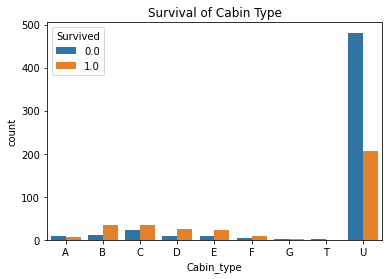

In [261]:
sns.countplot(x="Cabin_type",hue="Survived", data=train)
plt.title("Survival of Cabin Type")
plt.show()

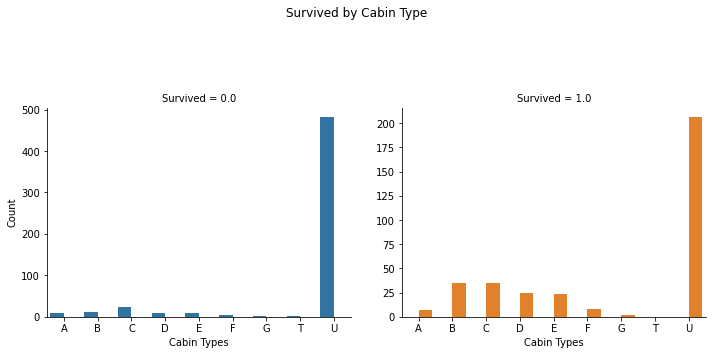

In [262]:
cabin_type_plot= sns.catplot(x="Cabin_type", hue="Survived", col="Survived", data=train, kind="count", sharey=False)
cabin_type_plot.fig.subplots_adjust(top=0.7)
cabin_type_plot.fig.suptitle("Survived by Cabin Type")
cabin_type_plot.set_xlabels("Cabin Types")
cabin_type_plot.set_ylabels("Count")
plt.show()

## Survival by Pclass

In [263]:
train.groupby("Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

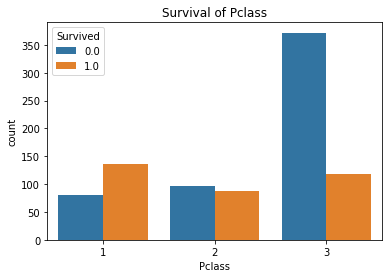

In [264]:
sns.countplot(x="Pclass",hue="Survived", data=train)
plt.title("Survival of Pclass")
plt.show()

## Survival by Sex

In [265]:
train.groupby("Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

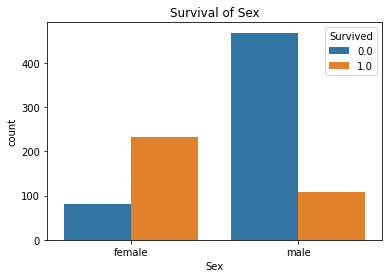

In [266]:
sns.countplot(x="Sex",hue="Survived", data=train)
plt.title("Survival of Sex")
plt.show()

## Survival by Age

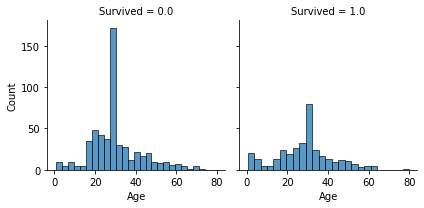

In [267]:
sns.FacetGrid(train, col="Survived").map(sns.histplot, "Age", bins=25)
plt.show()

## Survial by Sibsp

In [268]:
train.groupby("SibSp")["Survived"].mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

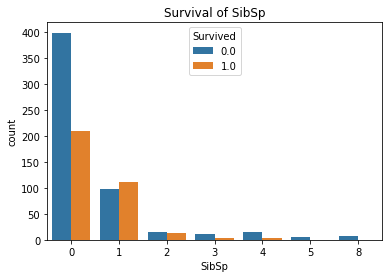

In [269]:
sns.countplot(x="SibSp",hue="Survived", data=train)
plt.title("Survival of SibSp")
plt.show()

## Survival by Parch

In [270]:
train.groupby("Parch")["Survived"].mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

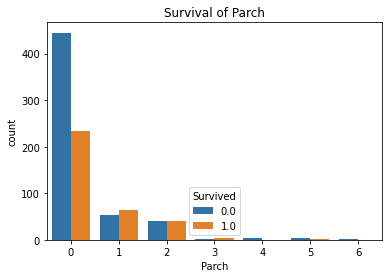

In [271]:
sns.countplot(x="Parch",hue="Survived", data=train)
plt.title("Survival of Parch")
plt.show()


## Survival by Fare


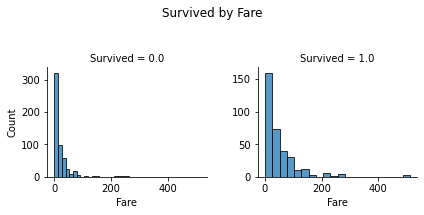

In [272]:
Fare_plot=sns.FacetGrid(train, col="Survived", sharey=False)
Fare_plot.map(sns.histplot, "Fare",bins=20)
Fare_plot.fig.subplots_adjust(top=0.7)
Fare_plot.fig.suptitle("Survived by Fare")
Fare_plot.set_xlabels("Fare")
Fare_plot.set_ylabels("Count")
plt.show()

## Survival by Embarked


In [273]:
train.groupby("Embarked")["Survived"].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

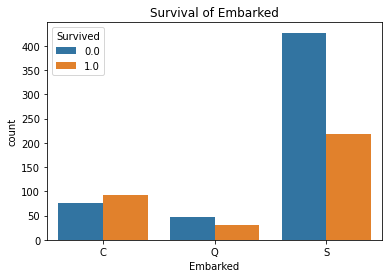

In [274]:
sns.countplot(x="Embarked",hue="Survived",data=train)
plt.title("Survival of Embarked")
plt.show()

## Survived by Title

In [275]:
train.groupby("Title")["Survived"].mean()

Title
Master    0.575000
Miss      0.703297
Mr        0.158192
Mrs       0.775362
Name: Survived, dtype: float64

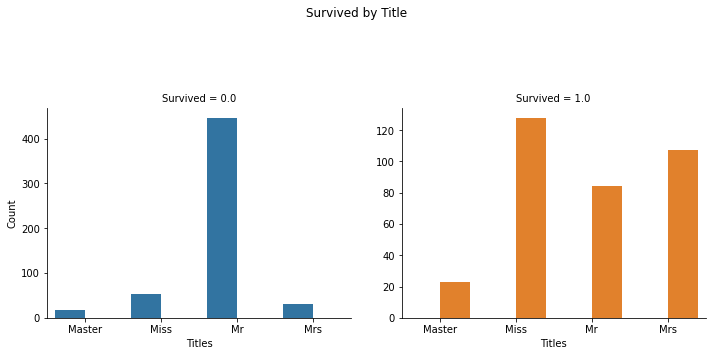

In [276]:
title_plot= sns.catplot(x="Title", hue="Survived", col="Survived", data=train, kind="count", sharey=False)
title_plot.fig.subplots_adjust(top=0.7)
title_plot.fig.suptitle("Survived by Title")
title_plot.set_xlabels("Titles")
title_plot.set_ylabels("Count")
plt.show()

In [277]:
train.max()

PassengerId                                         891
Survived                                              1
Pclass                                                3
Name                        van Melkebeke, Mr. Philemon
Age                                                  80
SibSp                                                 8
Parch                                                 6
Ticket                                        WE/P 5735
Fare                                            512.329
Cabin                                           Unknown
family_member_size                                   11
Sex_value                                             1
Cabin_type_value                                      8
Embarked_value                                        2
Title_value                                           3
family_member_type_value                              2
dtype: object

## Survival Factors

In [278]:
# source 2
train.corr()["Survived"].sort_values(key=lambda x: abs(x), ascending=False)

Survived                    1.000000
Sex_value                  -0.543351
Pclass                     -0.338481
Cabin_type_value           -0.301116
Fare                        0.257307
Embarked_value             -0.167675
family_member_type_value   -0.108631
Parch                       0.081629
Age                        -0.070323
Title_value                -0.062139
SibSp                      -0.035322
family_member_size          0.016639
PassengerId                -0.005007
Name: Survived, dtype: float64

In [279]:
# See what .index Does
# index gives the feature values that equaled true
###########################################################
# l=list(train.corr()[train.corr()["Survived"].abs()>.05] )
# p=list(train.corr()[train.corr()["Survived"].abs()>.05].index )
# print(len(l),"\n",l)
# print(len(p),"\n",p)
# res = [x for x in l + p if x not in l or x not in p]
# print(res)

In [280]:
# Source 2
related_columns = list(train.corr()[train.corr()["Survived"].abs() > 0.05].index)
related_columns.remove("Survived")
print(related_columns)

['Pclass', 'Age', 'Parch', 'Fare', 'Sex_value', 'Cabin_type_value', 'Embarked_value', 'Title_value', 'family_member_type_value']


# Models

In [281]:
Models = dict()
Model_acc = dict()

In [282]:
# Models['OH_CNN_model']=[OH_CNN_model,OH_acc_CNN[1]]
# Models['EN_CNN_model']=[EN_CNN_model, EN_acc_CNN[1]]

## DNN Models

### CNN Model

In [283]:
## testing
# X_train, X_val, X_test, y_train, y_val, y_test = get_train_test(OH_train, True)
# # X_train=X_train.values
# # y_train= y_train.values
# # X_val= X_val.values
# # y_val=y_val.values
# # X_train=np.expand_dims(X_train,axis=2)
# # X_val=np.expand_dims(X_val,axis=2)
# X_train, X_val, X_test, y_train, y_val, y_test = get_train_test(EN_train, True)
# print("X_val.shape: ",X_val.shape)
# print("y_val.shape: ",y_val.shape)
# print("X_train.shape: ",X_train.shape)
# print("y_train.shape: ",y_train.shape)

#### CNN Make Model

In [284]:
def makeCN_Model(input_shape):
  model = tf.keras.Sequential([
  #tf.keras.layers.Input(27,1),
  tf.keras.layers.Conv1D(128, 2, activation='relu',input_shape=input_shape),
  tf.keras.layers.MaxPooling1D(pool_size=2),
  tf.keras.layers.Conv1D(128, 4, activation='relu'),
  tf.keras.layers.MaxPooling1D(pool_size=2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model
#model.summary()

#### CNN Get Trained Model

In [285]:
def get_trained_CNN_model(Data):
  X_train, X_val, X_test, y_train, y_val, y_test = get_train_test(Data, True)
  # X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)
  x, y, z = X_train.shape
  model = makeCN_Model((y,z))
  early_stop = tf.keras.callbacks.EarlyStopping(patience=10)
  model.fit(X_train, y_train,epochs=4000, 
    validation_data=(X_val,y_val), 
    callbacks=[early_stop],
    verbose=0)
  acc_ofmodel = model.evaluate(X_val, y_val, verbose=0)
  #print("Accuracy:",acc_ofmodel[1])
  return model #, X_test, y_test 

#### Apply CNN and Get Plots

In [286]:
# for OH
X_train, X_val, X_test, y_train, y_val, y_test = get_train_test(OH_train, True)
x, y, z = X_train.shape
print("X_val.shape: ",X_val.shape)
print("y_val.shape: ",y_val.shape)
print("X_train.shape: ",X_train.shape)
print("y_train.shape: ",y_train.shape)
input_shape = (y,z)
OH_CNN_model=makeCN_Model((y,z))
# OH_CNN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
OH_CNN_model.summary()

X_val.shape:  (89, 27, 1)
y_val.shape:  (89,)
X_train.shape:  (712, 27, 1)
y_train.shape:  (712,)
Model: "sequential_142"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_100 (Conv1D)          (None, 26, 128)           384       
_________________________________________________________________
max_pooling1d_100 (MaxPoolin (None, 13, 128)           0         
_________________________________________________________________
conv1d_101 (Conv1D)          (None, 10, 128)           65664     
_________________________________________________________________
max_pooling1d_101 (MaxPoolin (None, 5, 128)            0         
_________________________________________________________________
flatten_50 (Flatten)         (None, 640)               0         
_________________________________________________________________
dense_714 (Dense)            (None, 100)               64100     
____________________

Accuracy:  0.8426966071128845


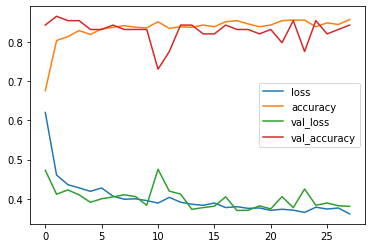

In [287]:
early_stop = tf.keras.callbacks.EarlyStopping(patience=10)
history = OH_CNN_model.fit(
    X_train, y_train,epochs=400, 
    validation_data=(X_val,y_val), 
    callbacks=[early_stop],
    verbose=0
)
pd.DataFrame(history.history).plot()
acc_ofmodel = OH_CNN_model.evaluate(X_val, y_val, verbose=0)
print("Accuracy: ",acc_ofmodel[1])

In [288]:
OH_acc_CNN = OH_CNN_model.evaluate(X_val, y_val, verbose=0)
print("Accuracy: ",OH_acc_CNN[1])
Models['OH_CNN_model']=[OH_CNN_model,OH_acc_CNN[1]]

Accuracy:  0.8426966071128845


In [289]:
# For EN
X_train, X_val, X_test, y_train, y_val, y_test = get_train_test(EN_train, True)
x, y, z = X_train.shape
print("X_val.shape: ",X_val.shape)
print("y_val.shape: ",y_val.shape)
print("X_train.shape: ",X_train.shape)
print("y_train.shape: ",y_train.shape)
input_shape = (y,z)
# print(input_shape)
EN_CNN_model=makeCN_Model((y,z))
# EN_CNN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
EN_CNN_model.summary()

X_val.shape:  (89, 11, 1)
y_val.shape:  (89,)
X_train.shape:  (712, 11, 1)
y_train.shape:  (712,)
Model: "sequential_143"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_102 (Conv1D)          (None, 10, 128)           384       
_________________________________________________________________
max_pooling1d_102 (MaxPoolin (None, 5, 128)            0         
_________________________________________________________________
conv1d_103 (Conv1D)          (None, 2, 128)            65664     
_________________________________________________________________
max_pooling1d_103 (MaxPoolin (None, 1, 128)            0         
_________________________________________________________________
flatten_51 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_717 (Dense)            (None, 100)               12900     
____________________

Accuracy:  0.8651685118675232


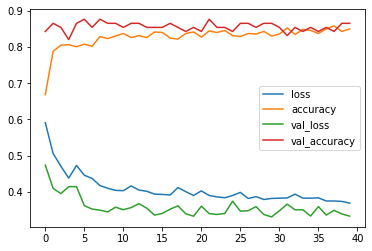

In [290]:
history = EN_CNN_model.fit(
    X_train, y_train,epochs=4000, 
    validation_data=(X_val,y_val), 
    callbacks=[early_stop],
    verbose=0
)
pd.DataFrame(history.history).plot()
acc_ofmodel = EN_CNN_model.evaluate(X_val, y_val, verbose=0)
print("Accuracy: ",acc_ofmodel[1])

In [291]:
# For Comparison 
EN_acc_CNN = EN_CNN_model.evaluate(X_val, y_val, verbose=0)
Models['EN_CNN_model']=[EN_CNN_model, EN_acc_CNN[1]]

In [292]:
# model = get_trained_DNN_model(dataset0)

### DNN Model

#### Fit DNN Model

In [293]:
def fit_DNN_Model(model, epochs=400):
  history = model.fit(
    X_train, y_train,epochs=epochs, 
    validation_data=(X_val,y_val), 
    callbacks=[early_stop],
    verbose=0
  )
  pd.DataFrame(history.history).plot()
  acc_ofmodel = model.evaluate(X_val, y_val, verbose=0)
  print("Accuracy: ",acc_ofmodel[1])
  return acc_ofmodel[1]

#### Make DNN Model

In [294]:
def DNN_model(input_dim):
   model = tf.keras.Sequential([
      tf.keras.layers.Input(shape=(input_dim)),
      tf.keras.layers.Dense(1000, activation='relu'), 
      tf.keras.layers.Dense(750, activation='relu'),  
      tf.keras.layers.Dense(500, activation='relu'),  
      tf.keras.layers.Dense(250, activation='relu'),  
      tf.keras.layers.Dense(50, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')                          
   ])
   model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
   return model

#### DNN Get Trained Model

In [295]:
def get_trained_DNN_model(Data):
  X_train, X_val, X_test, y_train, y_val, y_test = get_train_test(Data, False)
  # X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)
  model = DNN_model(X_train.shape[1])
  early_stop = tf.keras.callbacks.EarlyStopping(patience=10)
  model.fit(
    X_train, y_train,epochs=epochs, 
    validation_data=(X_val,y_val), 
    callbacks=[early_stop],
    verbose=0
  )
  acc_ofmodel = model.evaluate(X_val, y_val, verbose=0)
  #print("Accuracy:",acc_ofmodel[1])
  return model #, X_test, y_test

#### Fit and Plot Model

Accuracy:  0.8202247023582458


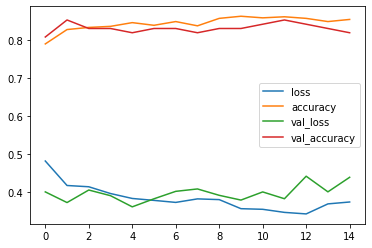

In [296]:
X_train, X_val, X_test, y_train, y_val, y_test = get_train_test(OH_train, False)
OH_DNN_model = DNN_model(X_train.shape[1])
OH_acc_DNN = fit_DNN_Model(OH_DNN_model)
Models['OH_DNN_model']=[OH_DNN_model,OH_acc_DNN]

Accuracy:  0.8426966071128845


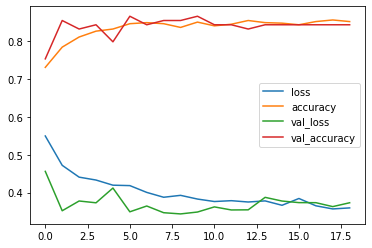

In [297]:
X_train, X_val, X_test, y_train, y_val, y_test = get_train_test(EN_train, False)
EN_DNN_model = DNN_model(X_train.shape[1])
EN_acc_DNN = fit_DNN_Model(EN_DNN_model)
Models['EN_DNN_model']=[EN_DNN_model,EN_acc_DNN]

In [298]:
X_train, X_val, X_test, y_train, y_val, y_test = get_train_test(EN_train, False)
Models['EN_DNN_model'][0].evaluate(X_val, y_val, verbose=0)

[0.3733810782432556, 0.8426966071128845]

### Deep and Wide Model

In [299]:
categorical_feature_names = ["Pclass", "Sex_value", "Embarked_value", "Cabin_type_value"]
numerical_feature_names = ["Age", "Fare", "SibSp", "Parch", "family_member_size"]
categorical_features = [
    feature_column.indicator_column(
        feature_column.categorical_column_with_vocabulary_list(key, sorted(list(train[key].unique())))
    ) for key in categorical_feature_names
]
# print(categorical_features)
numerical_features = [feature_column.numeric_column(key) for key in numerical_feature_names]
input_dictionary = dict()
inputs = dict()
for item in numerical_features:
    inputs[item.key] = tf.keras.layers.Input(name=item.key, shape=())
for item in categorical_features:
    #print(item.categorical_column.key)
    inputs[item.categorical_column.key] = tf.keras.layers.Input(name=item.categorical_column.key, shape=(), dtype="int32")

In [300]:
# Source 2 
# Helper Features
def features_and_labels(row_data):
    label = row_data.pop("Survived")
    features = row_data
    # print("Label: ", label)
    # print("Feature: ", features)
    return features, label

def create_dataset(pattern, epochs=1, batch_size=32, mode='eval'):
    dataset = tf.data.experimental.make_csv_dataset(
        pattern, batch_size
    )
    # print("Before map: ", dataset)
    dataset = dataset.map(features_and_labels)
    # print("After map: ",dataset)
    if mode == 'train':
        dataset = dataset.shuffle(buffer_size=128).repeat(epochs)
    #print(dataset)
    dataset = dataset.prefetch(1)
    #print("after prefetch\n",dataset)
    return dataset

def create_test_dataset(pattern, batch_size=32):
    dataset = tf.data.experimental.make_csv_dataset(
        pattern, batch_size
    )
    dataset = dataset.map(lambda features: features)
    dataset = dataset.prefetch(1)
    return dataset

In [301]:
# Train test split
train_data, val_data = train_test_split(
    train[categorical_feature_names + numerical_feature_names + ["Survived"]],
    test_size=.2,
    random_state=np.random.randint(0, 1000)
)
train_data.to_csv("train_data.csv", index=False)
val_data.to_csv("val_data.csv", index=False)
test[categorical_feature_names + numerical_feature_names].to_csv("test_data.csv", index=False)
batch_size = 32
train_dataset = create_dataset("train_data.csv", batch_size=batch_size, mode='train')
val_dataset = create_dataset("val_data.csv", batch_size=val_data.shape[0], mode='eval').take(1)
test_dataset = create_test_dataset("test_data.csv", batch_size = test.shape[0]).take(1)

In [302]:
# D&W Model
def build_deep_and_wide_model():
    deep = tf.keras.layers.DenseFeatures(numerical_features, name='deep')(inputs)
    deep = tf.keras.layers.Dense(16, activation='relu')(deep)
    deep = tf.keras.layers.Dropout(0.3)(deep)
    deep = tf.keras.layers.Dense(16, activation='relu')(deep)
    deep = tf.keras.layers.Dropout(0.3)(deep)
    deep = tf.keras.layers.Dense(16, activation='relu')(deep)
    deep = tf.keras.layers.Dropout(0.3)(deep)
    deep = tf.keras.layers.Dense(16, activation='relu')(deep)
    deep = tf.keras.layers.Dropout(0.3)(deep)
    wide = tf.keras.layers.DenseFeatures(categorical_features, name='wide')(inputs)
    wide = tf.keras.layers.Dense(32, activation='relu')(wide)
    combined = tf.keras.layers.concatenate(inputs=[deep, wide], name='combined')
    output = tf.keras.layers.Dense(1, activation="sigmoid")(combined)
    model = tf.keras.Model(inputs=list(inputs.values()), outputs=output)
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

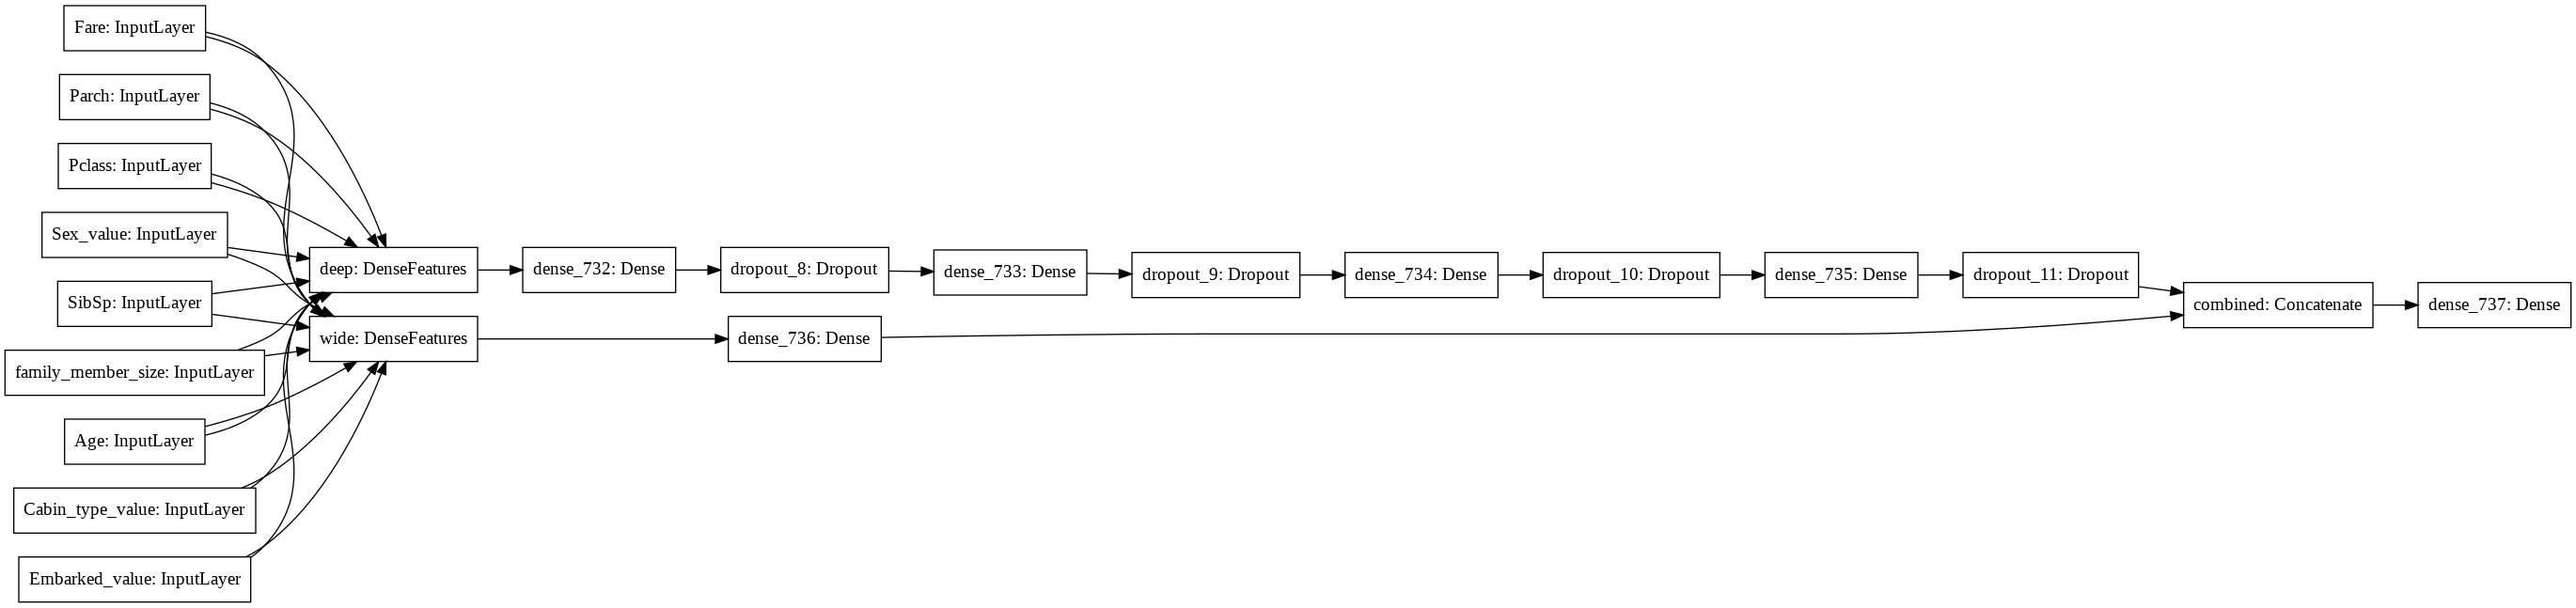

In [303]:
deep_and_wide_model = build_deep_and_wide_model()
tf.keras.utils.plot_model(deep_and_wide_model, show_shapes=False, rankdir='LR')

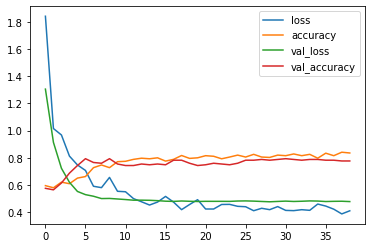

In [304]:
epochs = 400
early_stop = tf.keras.callbacks.EarlyStopping(patience=10)
steps_per_epoch = train_data.shape[0] // batch_size
history = deep_and_wide_model.fit(
    train_dataset, 
    steps_per_epoch=steps_per_epoch,
    validation_data=val_dataset,
    epochs=epochs,
    callbacks=[early_stop],
    verbose=0
)
pd.DataFrame(history.history).plot()

In [305]:
# y_pred =  np.array(deep_and_wide_model.predict(val_dataset) > 0.5, dtype=int).reshape(-1)
y_pred = np.array(deep_and_wide_model.predict(val_dataset)>0.5,dtype=int).reshape(-1)
score = accuracy_score(val_data["Survived"], y_pred)
print("Accuraccy Score: ",score)
print(sklearn.metrics.classification_report(val_data["Survived"], y_pred))
Survived = np.argmax(deep_and_wide_model.predict(test_dataset), axis=-1).reshape(-1)
# print(np.argmax(deep_and_wide_model.predict(test_dataset),axis=1).reshape(-1))
# print(test.shape)
print(Survived.shape)
Models['deep_and_wide_model']=[deep_and_wide_model,score]

Accuraccy Score:  0.5977653631284916
              precision    recall  f1-score   support

         0.0       0.62      0.77      0.69       103
         1.0       0.54      0.37      0.44        76

    accuracy                           0.60       179
   macro avg       0.58      0.57      0.56       179
weighted avg       0.59      0.60      0.58       179

(418,)


## Other Models

### Make Datasets

In [306]:
EN_train.corr()["Survived"].sort_values(key=lambda x: abs(x), ascending=False)

Survived                    1.000000
Sex_value                  -0.543351
Pclass                     -0.338481
Cabin_type_value           -0.301116
Fare                        0.257307
Embarked_value             -0.167675
family_member_type_value   -0.108631
Parch                       0.081629
Age                        -0.070323
Title_value                -0.062139
SibSp                      -0.035322
family_member_size          0.016639
Name: Survived, dtype: float64

In [307]:
LT = list(EN_train.corr()[EN_train.corr()["Survived"].abs() > 0.2].index) 
LT1 = list(OH_train.corr()[OH_train.corr()["Survived"].abs() > 0.2].index) 
dataset0 = EN_train[LT]
print(dataset0)
dataset1 = OH_train[LT1]
dataset2 = copy.copy(OH_train)
dataset3 = copy.copy(EN_train)
LT.remove("Survived")
LT1.remove("Survived")
testset0 = EN_test[LT]
testset1 = OH_test[LT1]
testset2 =  copy.copy(OH_test)
testset3 = copy.copy(EN_test)

     Survived  Pclass      Fare  Sex_value  Cabin_type_value
0         0.0     1.0  0.014151        1.0             1.000
1         1.0     0.0  0.139136        0.0             0.250
2         1.0     1.0  0.015469        0.0             1.000
3         1.0     0.0  0.103644        0.0             0.250
4         0.0     1.0  0.015713        1.0             1.000
..        ...     ...       ...        ...               ...
886       0.0     0.5  0.025374        1.0             1.000
887       1.0     0.0  0.058556        0.0             0.125
888       0.0     1.0  0.045771        0.0             1.000
889       1.0     0.0  0.058556        1.0             0.250
890       0.0     1.0  0.015127        1.0             1.000

[891 rows x 5 columns]


In [308]:
dataset0

,Survived,Pclass,Fare,Sex_value,Cabin_type_value
0,0.0,1.0,0.014151,1.0,1.000
1,1.0,0.0,0.139136,0.0,0.250
2,1.0,1.0,0.015469,0.0,1.000
3,1.0,0.0,0.103644,0.0,0.250
4,0.0,1.0,0.015713,1.0,1.000
...,...,...,...,...,...
886,0.0,0.5,0.025374,1.0,1.000
887,1.0,0.0,0.058556,0.0,0.125
888,0.0,1.0,0.045771,0.0,1.000
889,1.0,0.0,0.058556,1.0,0.250


### Dict set up

In [309]:
def model_name(name):
  if name == 'sgd':
    name = "Stochastic Gradient Descent"
    return name
  elif name == 'lr':
    name = "Logistic Regression"
    return name 
  elif name == 'svm':
    name = "Support Vector Classification"
    return name 
  elif name == 'knn':
    name = "K Nearest Neighbors Classification"
    return name 
  elif name == 'gpc':
    name = "Gaussian Process Classifier"
    return name 
  elif name == 'dtc':
    name = "Decision Tree Classifier"
    return name
  elif name == 'abc':
    name = "AdaBoost Classifier"
    return name
  elif name == 'rfc':
    name = "Random Forest Classifier"
    return name
  elif name == 'gbc':
    name = "Gradient Boosting Classifier"
    return name
  elif name == 0:
    name = "EN cor dataset"
    return name 
  elif name == 1:
    name = "OH cor dataset"
    return name 
  elif name == 2:
    name = "OH dataset"
    return name 
  elif name == 3:
    name = "EN dataset"
    return name
  else:
    return name
  return name

# "EN cor dataset"
# "OH cor dataset"
# "OH dataset"
# "EN dataset"


In [310]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process.kernels import RationalQuadratic, Exponentiation, RBF
import time
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

# Models
sgd = SGDClassifier(random_state = 42)
lr = LogisticRegression(random_state = 42)
svm = SVC(random_state = 42)
knn = KNeighborsClassifier()
gpc = GaussianProcessClassifier(random_state = 42)
dtc = DecisionTreeClassifier(random_state = 42)
abc = AdaBoostClassifier(random_state = 42)
rfc = RandomForestClassifier(random_state = 42)
gbc = GradientBoostingClassifier(random_state = 42)
# Model Dict
models = dict(sgd = sgd, 
              lr = lr, 
              svm = svm, 
              knn= knn, 
              gpc = gpc, 
              dtc = dtc, 
              abc =abc, 
              rfc = rfc,
              gbc = gbc)
# Parameters
params = {
    
    'sgd':dict(learning_rate = ['adaptive', 'optimal', 'constant', 'invscaling'],
               eta0 = list(np.arange(0.001, 0.15, 0.001)),
               max_iter = list(np.arange(1000.0,10000.0,10.0)),
               random_state= [42],
               early_stopping =[True]),
    'lr':dict(solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              C = list(np.arange(1,20)),
              max_iter = list(np.arange(100,1000,10))
              ),
    'svm':dict(kernel=['linear', 'poly', 'rbf', 'sigmoid'],
               gamma = ['scale', 'auto'],
               max_iter = [-1]),
    'knn':dict(n_neighbors = list(np.arange(5,50,5)),
               algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute'],
               leaf_size = list(np.arange(30,100, 10))
               ),
    'gpc':dict(#kernel = [(1.0 * RBF(1.0)), RationalQuadratic(length_scale=1.0, alpha=1.5)], #Exponentiation(RationalQuadratic(), exponent=2), Exponentiation(RBF(), exponent=2)],
              max_iter_predict = list(np.arange(100,1000,10))
               ),
    'dtc':dict(criterion = ['gini', 'entropy'],
               max_depth = [None]+list(np.arange(10,100,10)),
               min_samples_split = list(np.arange(2,10,2)),
               min_samples_leaf =  list(np.arange(1,10)),
               max_features = ['auto', 'sqrt', 'log2'] ,
               max_leaf_nodes = [None]+list(np.arange(100,1000,10))       
               ),
    'abc':dict(n_estimators = list(np.arange(50,100,10)),
              learning_rate = list(np.arange(1,20,1)),
              algorithm = ['SAMME', 'SAMME.R']             
               ),
    'rfc':dict(n_estimators = list(np.arange(100,500,10)),
              criterion = ['gini', 'entropy'],
              max_depth = [None]+list(np.arange(10,100,10)),
              min_samples_split = list(np.arange(2,10,2)),
              min_samples_leaf =  list(np.arange(1,10)),
              max_features = ['auto', 'sqrt', 'log2'] ,
              max_leaf_nodes = [None]+list(np.arange(100,1000,10))        
               ),
    'gbc':dict(loss=['deviance', 'exponential'],
               learning_rate = list(np.arange(0.05,0.5,0.05, dtype = float)),
               n_estimators = list(np.arange(100,500,10)),
               criterion=['friedman_mse', 'mse', 'mae'],
               min_samples_split = list(np.arange(2,10,2)),
               min_samples_leaf =  list(np.arange(1,10)),
               max_depth = list(np.arange(3,50,1)),
               max_features = ['auto', 'sqrt', 'log2'],
               max_leaf_nodes = [None]+list(np.arange(100,1000,10)),
               n_iter_no_change =[None]+list(np.arange(3,10,1)) 
               )
}
# Best Accuracy for each model may have different data 
# best_models format [model, accuracy, model name]
best_models=dict(sgd = [sgd,0,0], 
              lr = [lr,0,0], 
              svm = [svm,0,0], 
              knn= [knn,0,0], 
              gpc = [gpc,0,0], 
              dtc = [dtc,0,0], 
              abc =[abc,0,0], 
              rfc = [rfc,0,0],
              gbc = [gbc,0,0])
local_model = {
    'Data Set':[],
    'Best Model':[],
    'Accuracy':[]
}
datasets = {
  "EN cor dataset":dataset0,
  "OH cor dataset":dataset1,
  "OH dataset":dataset2, 
  "EN dataset":dataset3
}
testsets = {
  "EN cor dataset":testset0,
  "OH cor dataset":testset1,
  "OH dataset":testset2, 
  "EN dataset":testset3
}


### Find Best Models


In [ ]:
best_score = 0
best_model_name = ""
count = 0
# best_models format [model, accuracy, model name]
for data in datasets.keys():
  X_train, X_val, X_test, y_train, y_val, y_test = get_train_test(datasets[data], False)
  temp_best_score = 0
  temp_best_model = ''
  print("Dataset:",data)
  print("\n{:^40}|{:^40}".format("Model", "Accuracy"))
  for model in models.keys():
    random = RandomizedSearchCV(models[model], params[model],
                                n_iter=100, scoring='accuracy', n_jobs=-1, 
                                cv=3, verbose=0, random_state=42)
    # Fit Model
    random.fit(X_train, y_train)
    # Check to see if best model for the model type
    # best_models format [model, accuracy, model name]
    if best_models[model][1] < random.best_score_:
      best_models[model] = [random.best_estimator_, random.best_score_, data]

    # Start display 
    print("{:<40}|   {:<40.4f}".format(model_name(model), random.best_score_))
    # local max accuracy
    if random.best_score_ > temp_best_score:
       temp_best_score = random.best_score_
       temp_best_model = model_name(model)
    # Total max accuracy
    if random.best_score_ > best_score:
      best_score = random.best_score_
      best_model_name = model_name(model)
  # Exited For Loop
  # for visual best model per data set 
  local_model['Data Set'].append(data)
  local_model['Best Model'].append(temp_best_model)
  local_model['Accuracy'].append(temp_best_score)
  # local best accuracy score and model
  print("\nBest Score: %f \nBest Model: %s \nDataset: %s\n\n"
    %(temp_best_score, temp_best_model, data))
  count+=1
# Exited For Loop
print("Total Best Score:",best_score,"\nBest Model:",best_model_name)
df = pd.DataFrame(local_model)
df

Dataset: EN cor dataset

                 Model                  |                Accuracy                
Stochastic Gradient Descent             |   0.7879                                  
Logistic Regression                     |   0.7907                                  
Support Vector Classification           |   0.7879                                  
K Nearest Neighbors Classification      |   0.8132                                  
Gaussian Process Classifier             |   0.7879                                  
Decision Tree Classifier                |   0.8006                                  
AdaBoost Classifier                     |   0.7879                                  
Random Forest Classifier                |   0.8160                                  
Gradient Boosting Classifier            |   0.8132                                  

Best Score: 0.816036 
Best Model: Random Forest Classifier 
Dataset: EN cor dataset


Dataset: OH cor dataset

                

In [ ]:
from sklearn.metrics import accuracy_score
# Try variable majority voting 
#################################################
maj = np.zeros(int(len(OH_train)*.2)+1)
# best_model Format [model, accuracy, model name]
# for sklearn
for x in best_models.keys():
  dataset_name = best_models[x][2]
  X_train, X_val, X_test, y_train, y_val, y_test = get_train_test(datasets[dataset_name], False)
  model=best_models[x][0].fit(X_train,y_train)
  maj+=model.predict(X_test)

# for NNs
maj1 = np.zeros(int(len(OH_train)*.2)+1)
for i in datasets.keys():
  data = datasets[i]
  if "cor"  not in i:
    X_train, X_val, X_test, y_train, y_val, y_test = get_train_test(data, True)
    model = get_trained_CNN_model(data)
    y_pred = np.array(model.predict(X_test)>0.4,dtype=int).reshape(-1)
    maj1+= y_pred
  X_train, X_val, X_test, y_train, y_val, y_test = get_train_test(data, False)
  model = get_trained_DNN_model(data)
  y_pred = np.array(model.predict(X_test)>0.4,dtype=int).reshape(-1)
  maj1+= y_pred

In [ ]:
NN_pred = copy.copy(maj1)
sk_pred = copy.copy(maj)
pred_com = maj1+maj 
def print_best_acc(pred, num_stop, test_ans):
  local_acc = 0
  acc = 0
  num = 0
  print("\n{:^20}|{:^20}".format("Number of Correct", "Accuracy"))
  for i in range(1,num_stop):
    pred_arry = copy.copy(pred)
    for x in range(len(pred_arry)):
      if pred_arry[x] >= i:
        pred_arry[x] = 1
      else:
        pred_arry[x] = 0
    local_acc = accuracy_score(test_ans,pred_arry)
    print("{:^20}|  {:<20.4f}".format(">= "+str(i), local_acc))
    if local_acc > acc:
      num = i
      acc = local_acc
  print("{:^20}|  {:<20.4f}".format(">= "+str(num), acc ))

In [ ]:
NN_pred = copy.copy(maj)
sk_pred = copy.copy(maj1)
pred_com = NN_pred + sk_pred
print("Sklearn")
print_best_acc(sk_pred, 9, y_test)
print("NNs")
print_best_acc(NN_pred, 6, y_test)
print("Combined")
print_best_acc(pred_com, 15, y_test)

Using a majority of >=5 which is a little more than half of the number of models, the accuarcy is 0.8268. The best sklearn model is 0.82122 accuracy which is about 0.005 less. 

In [ ]:
cop = np.zeros(179)
print("{:^20}| {:^20}| {:^20}| {:^20}".format("Data Set", "DNN Type","Percent", "Accuracy"))
temp = 0
acc = 0
per = 0
for i in datasets.keys():
  data = datasets[i]
  #print(i)
  temp = 0
  acc = 0
  per = 0

  if "cor"  not in i:
    for j in np.linspace(.1, 1, num=10):
      #print("CNN:")
      X_train, X_val, X_test, y_train, y_val, y_test = get_train_test(data, True)
      model = get_trained_CNN_model(data)
      y_pred = np.array(model.predict(X_test)>j,dtype=int).reshape(-1)
      temp_acc = accuracy_score(y_test,y_pred)
      print("{:<20}| {:<20}| {:<20}| {:<20}".format(i, "CNN",j, accuracy_score(y_test,y_pred))) # for debug
      if temp_acc > acc:
        acc = temp_acc
        per = j 
    print("{:<20}| {:<20}| {:<20}| {:<20}".format(i, "CNN", per, acc))
  temp = 0
  acc = 0
  per = 0
  for j in np.linspace(.1, 1, num=10):
    X_train, X_val, X_test, y_train, y_val, y_test = get_train_test(data, False)
    model = get_trained_DNN_model(data)
    y_pred = np.array(model.predict(X_test)>j,dtype=int).reshape(-1)
    temp_acc = accuracy_score(y_test,y_pred)
    print("{:<20}| {:<20}| {:<20}| {:<20}".format(i, "DNN", j,accuracy_score(y_test,y_pred))) #debug
    if temp_acc > acc:
        acc = temp_acc
        per = j 
  print("{:<20}| {:<20}| {:<20}| {:<20}".format(i, "DNN", per,acc))
    
#print(cop)

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test = get_train_test(OH_train)
y_test.shape